In [7]:
%cd /home/bap/hana/EDA and Visualization/hanlhn/hanlhn

/home/bap/hana/EDA and Visualization/hanlhn/hanlhn


In [8]:
!pwd

/home/bap/hana/EDA and Visualization/hanlhn/hanlhn


## Import Libraries

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import collections
import itertools
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [10]:
full_data = pd.ExcelFile('dataset/dataset_01/Sample - Superstore.xls')
data = full_data.parse("Orders")
data.head(5)

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

## Check null values

In [11]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Check duplicated values

In [12]:
data.duplicated().sum()

0

## Create `year` and `month` columns for future use

In [13]:
data['year'] = data['Ship Date'].dt.year
data['month'] = data['Ship Date'].dt.month
data.head(5)

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
3  FUR-TA-10000577        Furniture       Tables   
4  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit  year  month  
0     0.00   41.9136  2016     11  
1     0.00  219.5820  2016     11  
2     0.00    6.8714  2016      6  
3     0.45 -383.0310  2015     10  
4     0.20    2.5164  2015     10  

[5 rows x 23 columns]

## Overview Dataset

In [14]:
profile = ProfileReport(data, title="Sample SuperStone Sales")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#*After overvewing, I see the data only contains a few records that have  `Order Date` and `Ship Date` in 2018, so I decide to drop them*

In [15]:
data = data[data["year"] <= 2017]
data

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
0          1  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
1          2  CA-2016-152156 2016-11-08 2016-11-11    Second Class   
2          3  CA-2016-138688 2016-06-12 2016-06-16    Second Class   
3          4  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
4          5  US-2015-108966 2015-10-11 2015-10-18  Standard Class   
...      ...             ...        ...        ...             ...   
9989    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9990    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9991    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9992    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9993    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520       Claire Gute   Consumer  United States        Henderson   
1       CG-12520       Claire Gute   Consumer  United States        Henderson   
2       DV-13045   Darrin Van Huff  Corporate  United States      Los Angeles   
3       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
4       SO-20335    Sean O'Donnell   Consumer  United States  Fort Lauderdale   
...          ...               ...        ...            ...              ...   
9989    TB-21400  Tom Boeckenhauer   Consumer  United States            Miami   
9990    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9991    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9992    DB-13060       Dave Brooks   Consumer  United States       Costa Mesa   
9993    CC-12220      Chris Cortes   Consumer  United States      Westminster   

      ...       Product ID         Category Sub-Category  \
0     ...  FUR-BO-10001798        Furniture    Bookcases   
1     ...  FUR-CH-10000454        Furniture       Chairs   
2     ...  OFF-LA-10000240  Office Supplies       Labels   
3     ...  FUR-TA-10000577        Furniture       Tables   
4     ...  OFF-ST-10000760  Office Supplies      Storage   
...   ...              ...              ...          ...   
9989  ...  FUR-FU-10001889        Furniture  Furnishings   
9990  ...  FUR-FU-10000747        Furniture  Furnishings   
9991  ...  TEC-PH-10003645       Technology       Phones   
9992  ...  OFF-PA-10004041  Office Supplies        Paper   
9993  ...  OFF-AP-10002684  Office Supplies   Appliances   

                                           Product Name     Sales Quantity  \
0                     Bush Somerset Collection Bookcase  261.9600        2   
1     Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2     Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3         Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                        Eldon Fold 'N Roll Cart System   22.3680        2   
...                                                 ...       ...      ...   
9989                             Ultra Door Pull Handle   25.2480        3   
9990  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.9600        2   
9991                              Aastra 57i VoIP phone  258.5760        2   
9992  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.6000        4   
9993  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.1600        2   

     Discount    Profit  year  month  
0        0.00   41.9136  2016     11  
1        0.00  219.5820  2016     11  
2        0.00    6.8714  2016      6  
3        0.45 -383.0310  2015     10  
4        0.20    2.5164  2015     10  
...       ...       ...   ...    ...  
9989     0.20    4.1028  2014      1  
9990     0.00   15.6332  2017      3  
9991     0.20   19.3932  2017      3  
9992     0.00   13.3200  2017      3  
9993     0.00   72.9480  2017      5  

[9952 rows x 23 columns]

## Q1: How have `Profit` and `Sales` changed over the `years`?

In [16]:
q1 = pd.DataFrame(data.groupby(['year'])['Profit', 'Sales'].sum())
q1["year"] = data["year"].sort_values().unique()
q1

Profit        Sales  year
year                               
2014  47292.7255  470383.1931  2014
2015  62881.5299  479442.5020  2015
2016  82941.1017  611325.7530  2016
2017  92346.8752  730889.7154  2017

In [122]:
profit = go.Scatter(
    x=list(q1['year']),
    y=list(q1['Profit']),
    name='Profit'
)

sales = go.Scatter(
    x=list(q1['year']),
    y=list(q1['Sales']),
    name='Sales'
)

layout = go.Layout(
    showlegend=True, 
    height=600,
    width=800,
    title='How Profit and Sales changed over the years?',
    xaxis=dict(
        dtick= 1
    )
)
fig = go.Figure(data=[profit, sales], layout=layout, layout_xaxis_range=[q1['year'].min(), q1['year'].max()])
fig.show()

## Q2: How do `Profit Rate` (Profit/Sales) over `years`?

In [18]:
q2 = q1.copy()
q2["Profit_Rate"] = q2["Profit"] / q1["Sales"]
q2

Profit        Sales  year  Profit_Rate
year                                            
2014  47292.7255  470383.1931  2014     0.100541
2015  62881.5299  479442.5020  2015     0.131156
2016  82941.1017  611325.7530  2016     0.135674
2017  92346.8752  730889.7154  2017     0.126349

In [123]:
profit_rate = go.Scatter(
    x=list(q2['year']),
    y=list(q2['Profit_Rate']),
    name='Profit rate'
)

layout = go.Layout(
    showlegend=False, 
    width=800,
    height=500,
    title='How Profit rate changed over the years?',
    xaxis=dict(
        dtick= 1
    ), 
    yaxis=dict(
        dtick= 0.02
    )
)
fig = go.Figure(data=profit_rate, layout=layout, 
                layout_xaxis_range=[q2['year'].min(), q2['year'].max()], 
                layout_yaxis_range=[0, q2['Profit_Rate'].max() + 0.05])
fig.show()

## Q3: How do `Profit` and `Sales` change over `months` in `2017`?

In [20]:
q3 = data[data['year'] == 2017]
q3 = q3.groupby(['month'], as_index = False)['Profit', 'Sales'].sum()
q3

month      Profit        Sales
0       1   6359.2081   42297.0440
1       2   2058.0360   23506.7824
2       3  13157.4265   52891.3850
3       4   2678.0235   40021.6803
4       5   5910.0197   44774.9324
5       6   7195.1466   47220.4981
6       7   6639.3986   47183.8730
7       8  10155.0590   63760.0200
8       9  11237.4753   91427.8670
9      10   8825.8434   75551.6612
10     11   8689.7765  105200.5130
11     12   9441.4620   97053.4590

In [124]:
profit = go.Scatter(
    x=list(q3['month']),
    y=list(q3['Profit']),
    name='Profit'
)

sales = go.Scatter(
    x=list(q3['month']),
    y=list(q3['Sales']),
    name='Sales'
)

layout = go.Layout(
    showlegend=True, 
    height=600,
    width=800,
    title='How Profit and Sales changed over months in 2017?',
    xaxis=dict(
        dtick= 1
    )
)
fig = go.Figure(data=[profit, sales], layout=layout, layout_xaxis_range=[q3['month'].min(), q3['month'].max()])
fig.show()

## Q4: Which `states` have the `highest return rates`?

In [24]:
data_return = full_data.parse("Returns")
data = data.merge(data_return, on="Order ID", how="left")
data.drop_duplicates(inplace=True)
data["Returned"] = data["Returned"].map(lambda x: True if x == "Yes" else False)
data.tail()

Row ID        Order ID Order Date  Ship Date       Ship Mode  \
9947    9990  CA-2014-110422 2014-01-21 2014-01-23    Second Class   
9948    9991  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9949    9992  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9950    9993  CA-2017-121258 2017-02-26 2017-03-03  Standard Class   
9951    9994  CA-2017-119914 2017-05-04 2017-05-09    Second Class   

     Customer ID     Customer Name   Segment        Country         City  ...  \
9947    TB-21400  Tom Boeckenhauer  Consumer  United States        Miami  ...   
9948    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9949    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9950    DB-13060       Dave Brooks  Consumer  United States   Costa Mesa  ...   
9951    CC-12220      Chris Cortes  Consumer  United States  Westminster  ...   

             Category  Sub-Category  \
9947        Furniture   Furnishings   
9948        Furniture   Furnishings   
9949       Technology        Phones   
9950  Office Supplies         Paper   
9951  Office Supplies    Appliances   

                                           Product Name    Sales Quantity  \
9947                             Ultra Door Pull Handle   25.248        3   
9948  Tenex B1-RE Series Chair Mats for Low Pile Car...   91.960        2   
9949                              Aastra 57i VoIP phone  258.576        2   
9950  It's Hot Message Books with Stickers, 2 3/4" x 5"   29.600        4   
9951  Acco 7-Outlet Masterpiece Power Center, Wihtou...  243.160        2   

     Discount   Profit  year  month  Returned  
9947      0.2   4.1028  2014      1     False  
9948      0.0  15.6332  2017      3      True  
9949      0.2  19.3932  2017      3      True  
9950      0.0  13.3200  2017      3      True  
9951      0.0  72.9480  2017      5     False  

[5 rows x 24 columns]

In [26]:
q4 = data.groupby(['State'], as_index=False)['Returned'].mean()
q4 = q4.sort_values('Returned', ascending=False).reset_index(drop=True)
q4.head(5)

State  Returned
0        Utah  0.226415
1  California  0.168421
2      Oregon  0.161290
3    Colorado  0.138122
4     Montana  0.133333

In [70]:
colors = ['#a0d4d6',] * len(list(q4['State']))
colors[np.argmax(list(q4['Returned']))] = 'darkturquoise'

fig = go.Figure(data=[go.Bar(
    x=q4['State'],
    y=q4['Returned'],
    marker_color=colors
)])
fig.update_layout(
            width=1500,
            height=700,
            margin=dict(r=50, l=100, b=100, t=100),
            title="Q4. Which states have the highest return rate?",
        )
fig.show()

## Q5: Which `categories` have the `highest return rates`?

In [44]:
q5 = data.groupby(['Category'], as_index=False)['Returned'].mean()
q5 = q5.sort_values('Returned', ascending=False).reset_index(drop=True)
q5.head(5)

Category  Returned
0       Technology  0.084599
1        Furniture  0.080133
2  Office Supplies  0.077346

In [125]:
colors = ['#a0d4d6',] * len(list(q5['Category']))
colors[np.argmax(list(q5['Returned']))] = 'darkturquoise'

fig = go.Figure(data=[go.Bar(
    x=q5['Category'],
    y=q5['Returned'],
    marker_color=colors
)])
fig.update_layout(
            width=700,
            height=600,
            margin=dict(r=50, l=100, b=100, t=100),
            title="Q5. Which categories have the highest return rate?",
            xaxis = dict(title='Category'),
            yaxis = dict(title='Return rate')
        )
fig.show()

## Q6: Which `month` of the `year` has the `most orders`?

In [97]:
q6 = pd.DataFrame(data.groupby(['month'], as_index = False)['Order ID'].count())
print(q6)
most_orders = q6[q6['Order ID'] == q6['Order ID'].max()]
most_orders

    month  Order ID
0       1       440
1       2       324
2       3       652
3       4       653
4       5       694
5       6       764
6       7       721
7       8       674
8       9      1356
9      10       831
10     11      1436
11     12      1407


month  Order ID
10     11      1436

In [84]:
colors = ['#a0d4d6',] * len(list(q6['month']))
colors[np.argmax(list(q6['month']))-1] = 'darkturquoise'

fig = go.Figure(data=[go.Bar(
    x=q6['month'],
    y=q6['Order ID'],
    marker_color=colors 
)])
fig.update_layout(
            width=1500,
            height=600,
            title_text='Month has the most orders',
            yaxis=dict(title='Number of Orders'),
            xaxis=dict(
                title='Month',
                dtick= 1
            ) 
)

## Q7: Top `10 best-selling` products?

In [ ]:
q7 = pd.DataFrame(data.groupby(['Product Name'], as_index = False)['Order ID'].count())
q7 = q7.sort_values('Order ID')
q7.tail(10)

Product Name  Order ID
1449  Situations Contoured Folding Chairs, 4/Set        15
1510                     Storex Dura Pro Binders        16
1496                  Staple-based wall hangings        16
1495                              Staple remover        17
1499                     Staples in misc. colors        18
941                   KI Adjustable-Height Table        18
258                      Avery Non-Stick Binders        20
1498                                     Staples        46
536                            Easy-staple paper        46
1492                             Staple envelope        48

## Q8: Which `sub-category` are usually `sold together`?

In [95]:
q8 = list(data.drop_duplicates(["Order ID", "Sub-Category"])
        .groupby(["Order ID"], as_index=False)["Sub-Category"]
        .agg(lambda x: list(x))["Sub-Category"])

counts = collections.Counter()
for sublist in q8:
        sublist = sorted(sublist)
        counts.update(itertools.combinations(sublist, 2))
q8 = sorted(counts.items(), key=lambda item: item[1], reverse=True)
q8[:5]

[(('Binders', 'Paper'), 275),
 (('Binders', 'Storage'), 199),
 (('Binders', 'Furnishings'), 197),
 (('Binders', 'Phones'), 197),
 (('Furnishings', 'Paper'), 177)]

## Q9: `Why` did `sales` increase `strongly`, but `profit` increased very `slowly`?

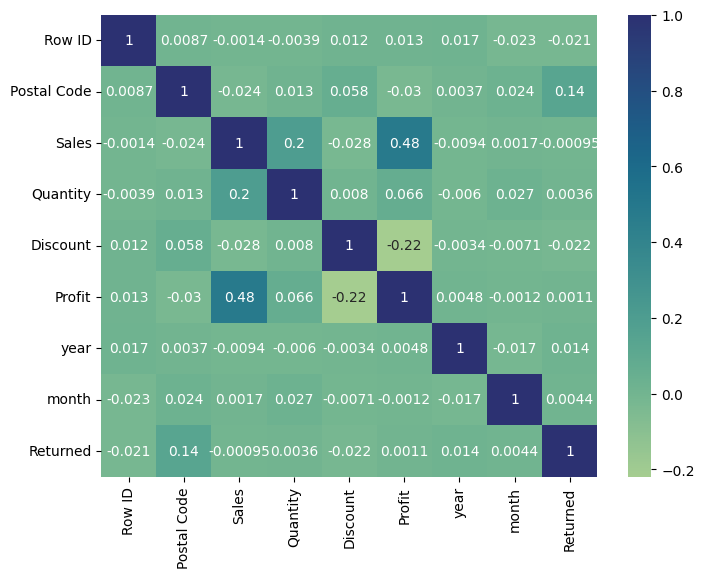

In [126]:
corr_mat = data.corr()
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_mat, annot=True, cmap='crest')

In [103]:
q9 = data[['Ship Date', 'year', 'Profit', 'Sales', 'Discount']]
q9 = q9.sort_values(['Ship Date', 'Discount'])
q9

Ship Date  year    Profit    Sales  Discount
7153 2014-01-07  2014    5.2398   12.780       0.0
7941 2014-01-07  2014    5.5512   16.448       0.2
5306 2014-01-08  2014    9.3312   19.440       0.0
733  2014-01-08  2014    4.2717   11.784       0.2
734  2014-01-08  2014  -64.7748  272.736       0.2
...         ...   ...       ...      ...       ...
2857 2017-12-31  2017    2.9547    6.030       0.0
5126 2017-12-31  2017    1.9224    8.544       0.2
5127 2017-12-31  2017  105.2970  842.376       0.2
6126 2017-12-31  2017  -34.0704  340.704       0.2
6066 2017-12-31  2017   -0.9900    1.188       0.7

[9952 rows x 5 columns]

In [104]:
q9["Discount Amount"] = q9["Discount"] * q9["Sales"]
q9 = q9.groupby(["year"], as_index=False)["Discount Amount"].sum()
q9

year  Discount Amount
0  2014     75993.269887
1  2015     63708.134840
2  2016     81117.163980
3  2017    101363.999538

In [108]:
profit = go.Scatter(
    x=list(q1['year']),
    y=list(q1['Profit']),
    name='Profit'
)

sales = go.Scatter(
    x=list(q1['year']),
    y=list(q1['Sales']),
    name='Sales'
)

discount_amount = go.Scatter(
    x=list(q9['year']),
    y=list(q9['Discount Amount']),
    name='Discount amount'
)

layout = go.Layout(
    showlegend=True, 
    width=800,
    height=700,
    title='How Profit and Sales changed over the years?',
    xaxis=dict(
        dtick= 1
    )
)
fig = go.Figure(data=[profit, sales, discount_amount], layout=layout, layout_xaxis_range=[q1['year'].min(), q1['year'].max()])
fig.show()

## Q10: `Why` does `profit increase` but `profit rate decreases`?

*As the above figure, I suppose the reason is that: `profit increases slowly` while `sales increases strongly`, so the ratio profit / sales = `profit rate decreases.`*

In [117]:
q10 = data[['Ship Date', 'year', 'month', 'Profit', 'Sales']]
q10['Profit Rate'] = q10['Profit'] / q10['Sales']
q10 = q10.groupby(['year'], as_index=False)['Profit Rate'].mean()
#q10['timestamp'] = q10['month'].astype(str) + '/' + q10['year'].astype(str)
q10

year  Profit Rate
0  2014     0.117506
1  2015     0.118118
2  2016     0.130970
3  2017     0.116036

In [129]:
profit_rate = go.Scatter(
    x=list(q10['year']),
    y=list(q10['Profit Rate']),
    name='Profit Rate'
)

layout = go.Layout(
    showlegend=True, 
    width=1000,
    height=500,
    title='How Profit rate changed over the months in 4 years?',
    xaxis=dict(
        dtick= 1
    )
)
fig = go.Figure(data=profit_rate, layout=layout, layout_xaxis_range=[q10['year'].min(), q10['year'].max()], layout_yaxis_range=[0, q10['Profit Rate'].max()+0.02])
fig.show()